In [1]:
import pickle
import pandas as pd
import clustering_algorithms
import time
import matplotlib as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn')
%load_ext autotime

In [2]:
with open('final.pkl', 'rb') as f:
    df = pickle.load(f)

time: 26 ms


In [3]:
df=df.drop_duplicates(['review'])

time: 31.1 ms


# Running Chosen Cluster- CV

In [4]:
(cv, tfidf)= clustering_algorithms.making_vectorizers(df.review, 50)

time: 17.7 s


In [5]:
cv.fit(df['review'])

time: 11 s


In [6]:
cv.kmeans(n_clusters=5)

time: 908 ms


# Final TSNE- CV

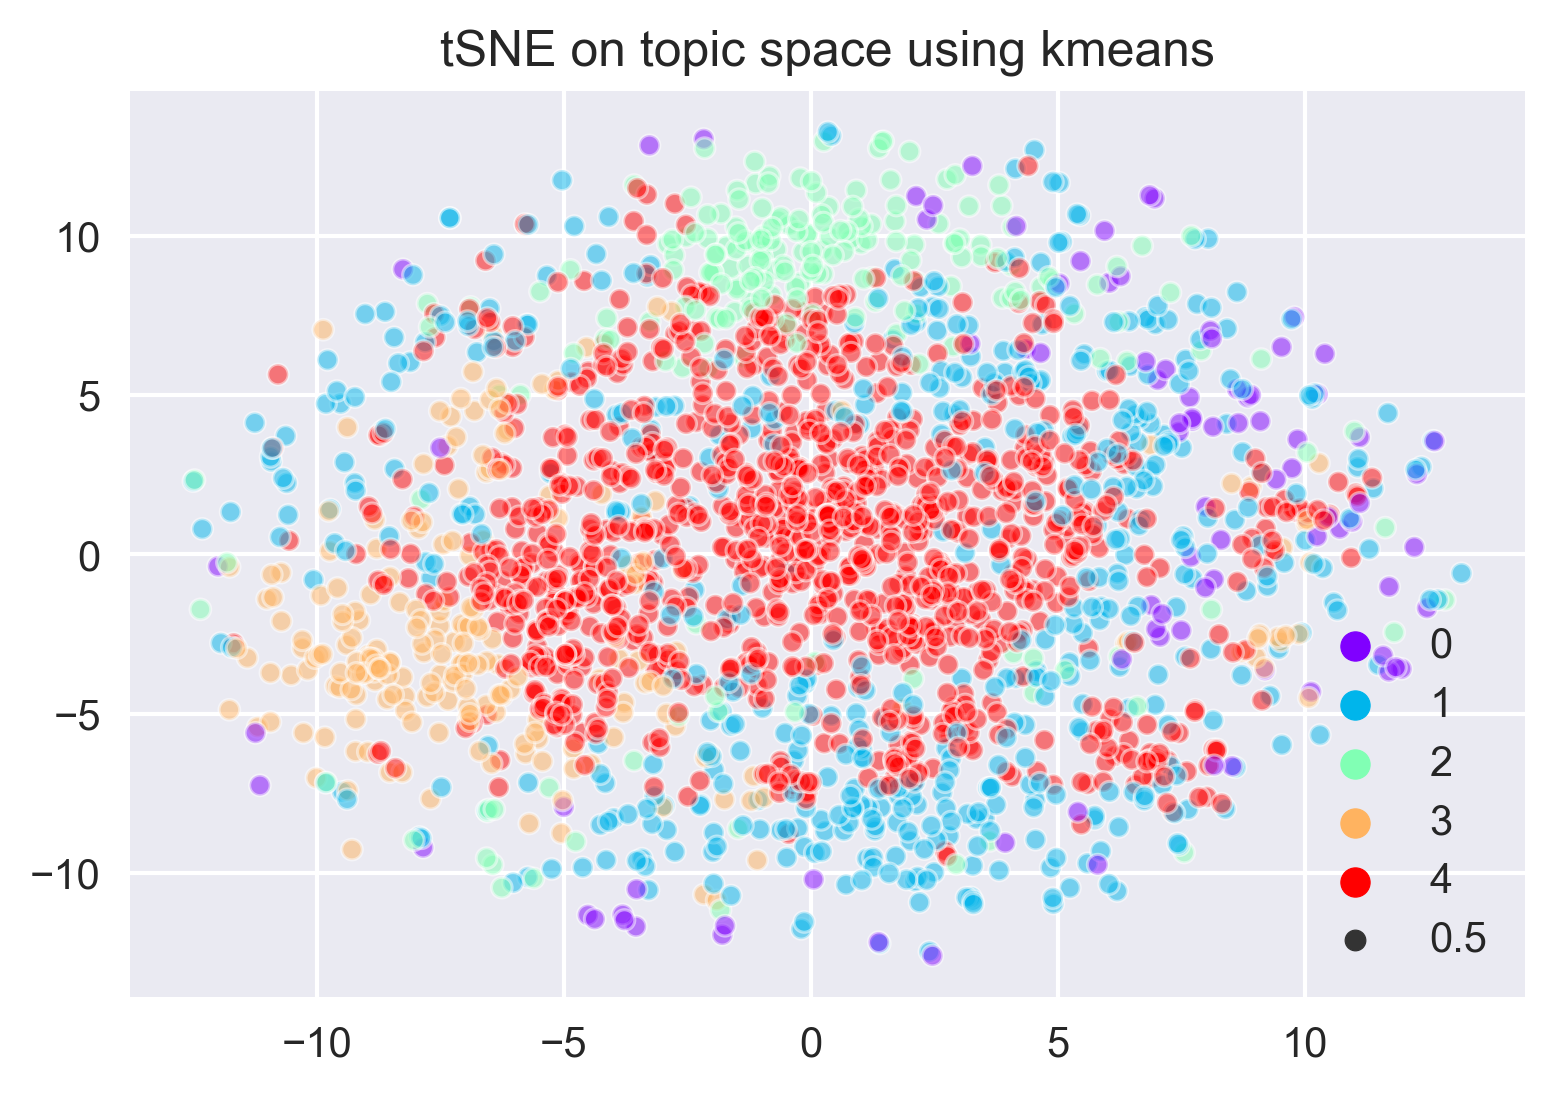

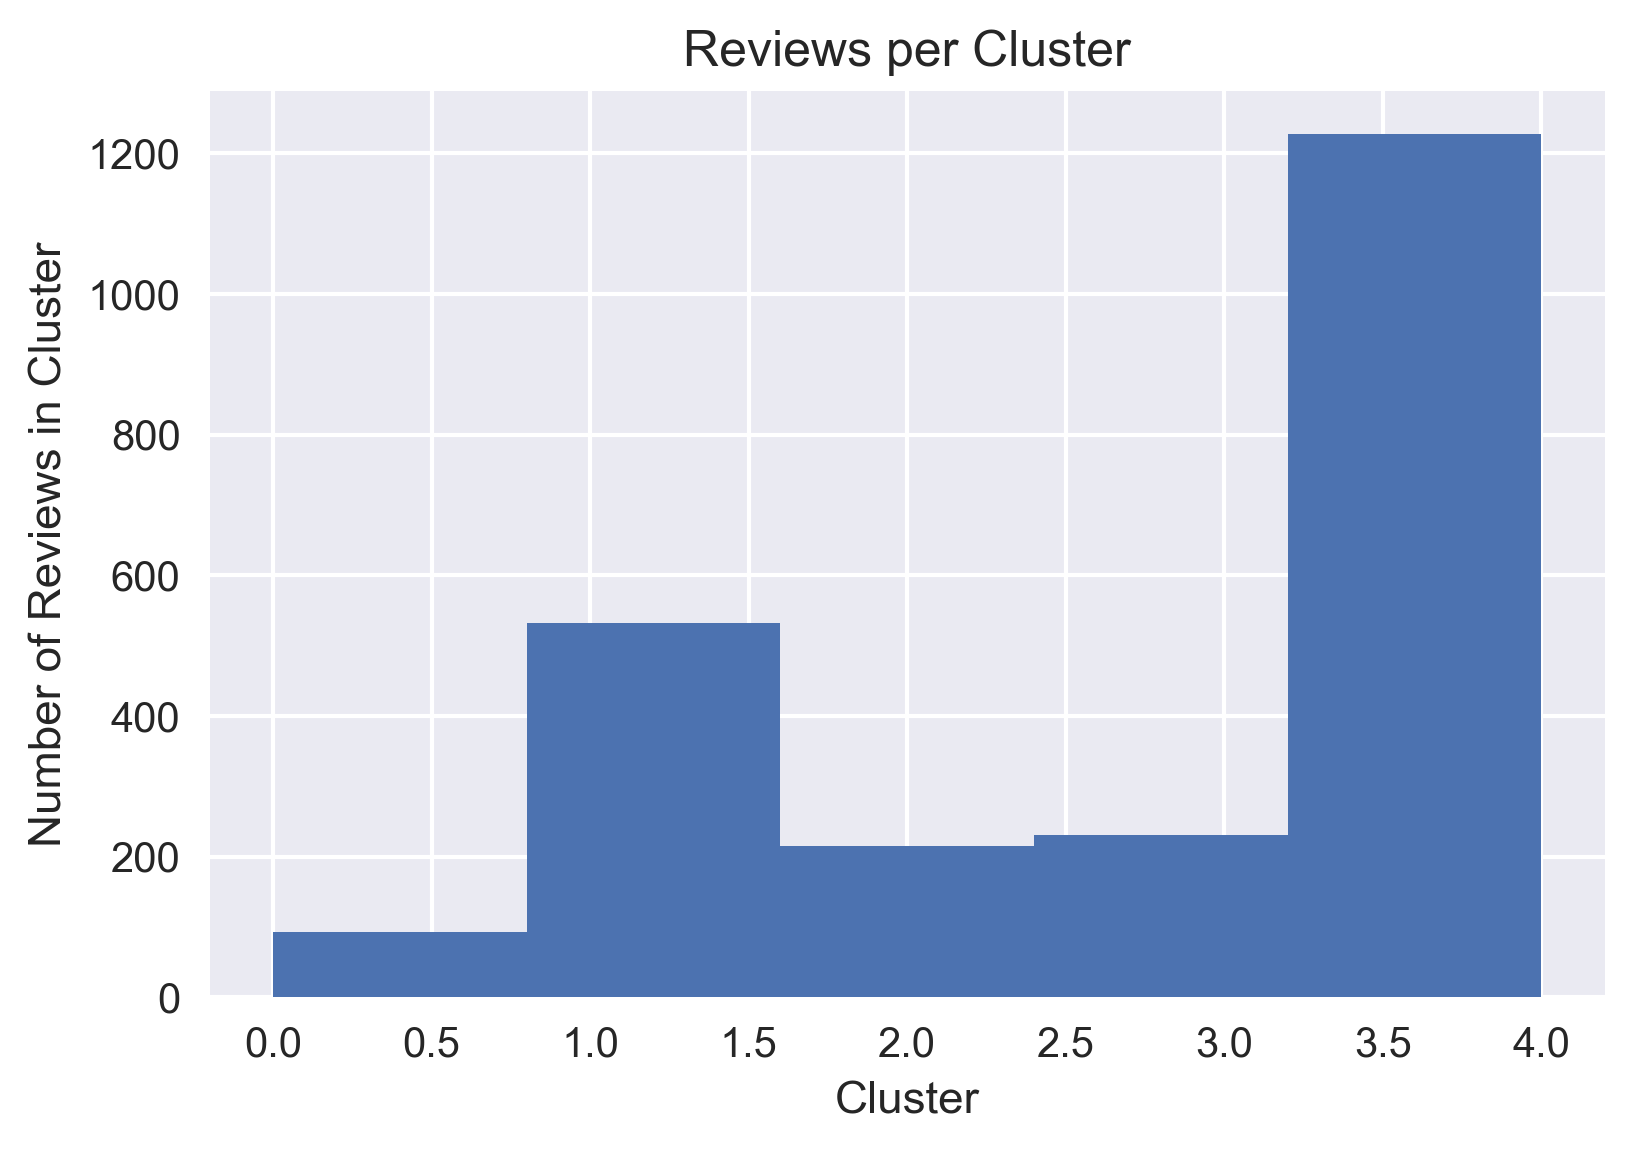

time: 8min 14s


In [7]:
cv.tsne(2,100)

# Running Chosen Cluster- TFIDF

In [8]:
tfidf.fit(df['review'])

time: 3.79 s


In [9]:
tfidf.kmeans(n_clusters=5)

time: 468 ms


# Final TSNE- TFIDF

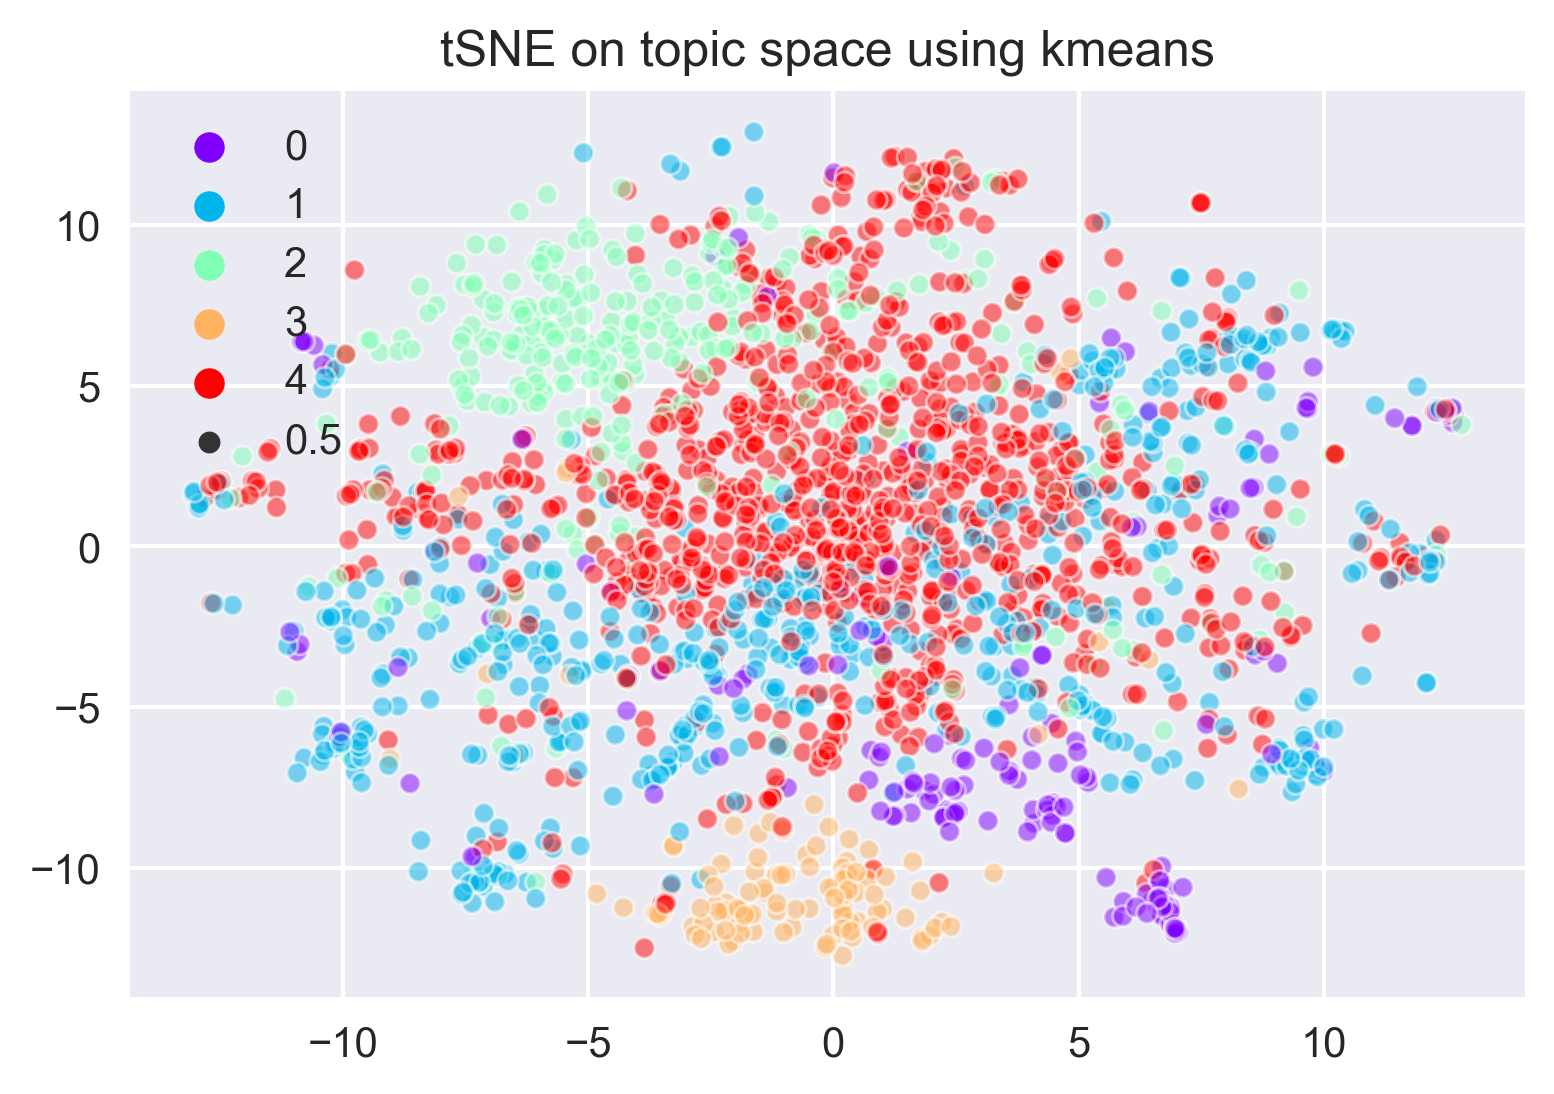

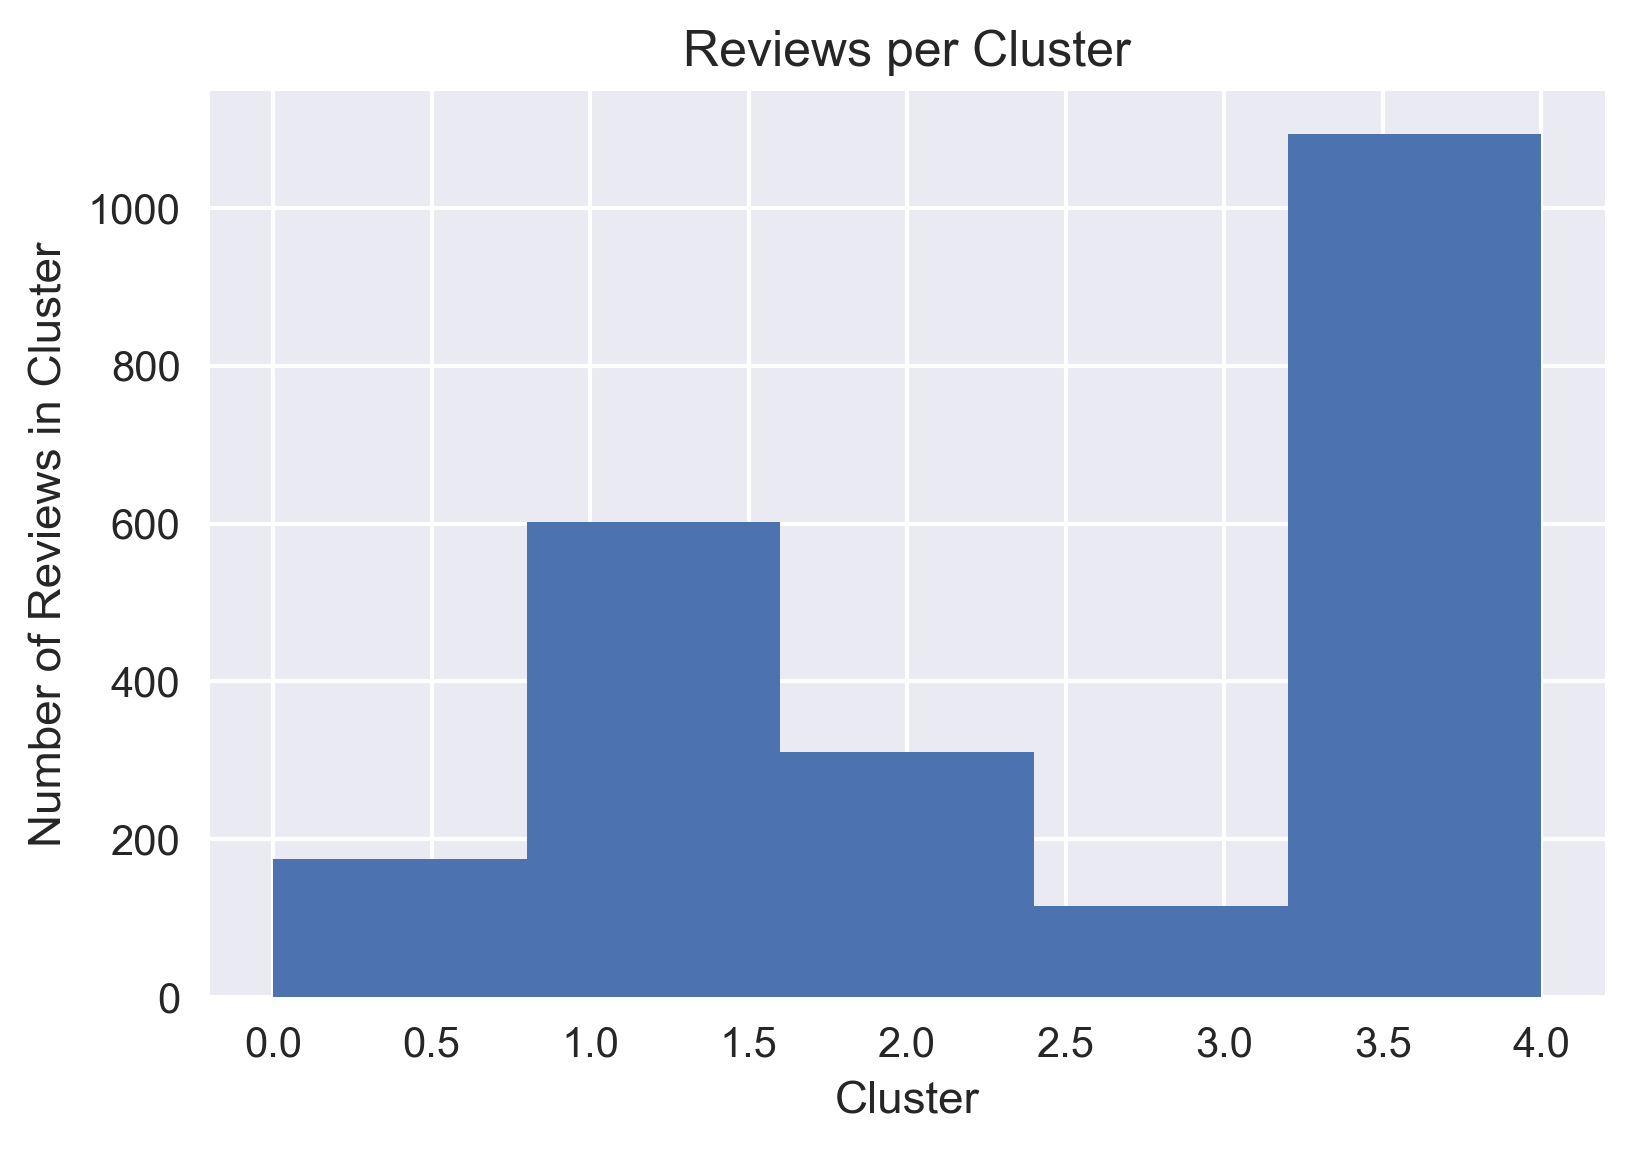

time: 4min 15s


In [10]:
tfidf.tsne(2,100)

# Discerning Meaning

In [11]:
len(cv.labels_)

2296

time: 20.3 ms


In [12]:
df['cluster']=pd.Series(cv.labels_)

time: 539 ms


## Intra-Cluster Star Variation

In [13]:
df.groupby(['cluster', 'star']).count()

username  eye_color  hair  skin_tone  skin_type  skin_concerns  \
cluster star                                                                   
0.0     100         47         47    47         47         47             47   
        20          12         12    12         12         12             12   
        40           5          5     5          5          5              5   
        60           6          6     6          6          6              6   
        80          16         16    16         16         16             16   
1.0     100        262        262   262        262        262            262   
        20          71         71    71         71         71             71   
        40          43         43    43         43         43             43   
        60          50         50    50         50         50             50   
        80          44         44    44         44         44             44   
2.0     100         99         99    99         99         99             99   
        20          32         32    32         32         32             32   
        40          20         20    20         20         20             20   
        60          19         19    19         19         19             19   
        80          25         25    25         25         25             25   
3.0     100        109        109   109        109        109            109   
        20          30         30    30         30         30             30   
        40          23         23    23         23         23             23   
        60          14         14    14         14         14             14   
        80          30         30    30         30         30             30   
4.0     100        617        617   617        617        617            617   
        20         160        160   160        160        160            160   
        40         100        100   100        100        100            100   
        60          87         87    87         87         87             87   
        80         134        134   134        134        134            134   

              foundation_color  review  recommend  unhelpful  helpful  
cluster star                                                           
0.0     100                 47      47         47         47       47  
        20                  12      12         12         12       12  
        40                   5       5          5          5        5  
        60                   6       6          6          6        6  
        80                  16      16         16         16       16  
1.0     100                262     262        262        262      262  
        20                  71      71         71         71       71  
        40                  43      43         43         43       43  
        60                  50      50         50         50       50  
        80                  44      44         44         44       44  
2.0     100                 99      99         99         99       99  
        20                  32      32         32         32       32  
        40                  20      20         20         20       20  
        60                  19      19         19         19       19  
        80                  25      25         25         25       25  
3.0     100                109     109        109        109      109  
        20                  30      30         30         30       30  
        40                  23      23         23         23       23  
        60                  14      14         14         14       14  
        80                  30      30         30         30       30  
4.0     100                617     617        617        617      617  
        20                 160     160        160        160      160  
        40                 100     100        100        100      100  
        60                  87      87         87    

time: 66.7 ms


## Intra-Cluster Helpfulness Variation

In [14]:
df.groupby(['cluster', 'helpful']).count()

username  eye_color  hair  skin_tone  skin_type  \
cluster helpful                                                    
0.0     0              29         29    29         29         29   
        1               3          3     3          3          3   
        13              1          1     1          1          1   
        132             1          1     1          1          1   
        14              1          1     1          1          1   
        153             1          1     1          1          1   
        16              1          1     1          1          1   
        17              1          1     1          1          1   
        18              1          1     1          1          1   
        19              1          1     1          1          1   
        2               2          2     2          2          2   
        20              1          1     1          1          1   
        214             1          1     1          1          1   
        23              1          1     1          1          1   
        24              2          2     2          2          2   
        27              1          1     1          1          1   
        292             1          1     1          1          1   
        3               5          5     5          5          5   
        33              1          1     1          1          1   
        34              1          1     1          1          1   
        37              1          1     1          1          1   
        39              1          1     1          1          1   
        390             1          1     1          1          1   
        392             1          1     1          1          1   
        4               3          3     3          3          3   
        45              1          1     1          1          1   
        5               2          2     2          2          2   
        513             1          1     1          1          1   
        55              1          1     1          1          1   
        59              1          1     1          1          1   
...                   ...        ...   ...        ...        ...   
4.0     43              1          1     1          1          1   
        44              2          2     2          2          2   
        45              3          3     3          3          3   
        47              1          1     1          1          1   
        48              3          3     3          3          3   
        5              27         27    27         27         27   
        50              1          1     1          1          1   
        52              1          1     1          1          1   
        53              1          1     1          1          1   
        58              1          1     1          1          1   
        59              1          1     1          1          1   
        6              16         16    16         16         16   
        60              3          3     3          3          3   
        62              1          1     1          1          1   
        63              4          4     4          4          4   
        67              2          2     2          2          2   
        7              12         12    12         12         12   
        70              1          1     1          1          1   
        72              2          2     2          2          2   
        8              14         14    14         14         14   
        80              2          2     2          2          2   
        81              1          1     1          1          1   
        82              1          1     1          1          1   
        83              1          1     1          1          1   
        85              1          1     1          1          1   
        9              10         10    10         10         10   
     

time: 97.6 ms
